In [1]:
import pandas as pd # our main priority here
import numpy as np  # just in case, but also comes along with pandas
from matplotlib import pyplot as plt # for plotting

In [2]:
# dictionary that holds the wins, draws, and losses for three 
# football (soccer) teams over three years. This is realized 
# in a simple way by just doing nine rows, where each row has
# the year, team, wins, draws, and losses.

football_data = { 
    'year': [
        2010, 2011, 2012,
        2010, 2011, 2012,
        2010, 2011, 2012
        ],
    'team': [
        'FCBarcelona', 'FCBarcelona',
        'FCBarcelona', 'RMadrid',
        'RMadrid', 'RMadrid',
        'ValenciaCF', 'ValenciaCF',
        'ValenciaCF'
    ],
    'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
    'draws': [6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
    'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
}

# The task: now we want to manipulate and present this data without too much headache!
# Solution: Pandas. 🐼 (yes iPython/Jupyter supports emoji!)

In [3]:
# warm up: how many wins did FCB have in 2010?
print(football_data['wins'][0]) # 0 because 2010 is index 0 and FCB is index 0

# warm up: how many wins did RMadrid have in 2011?
print(football_data['wins'][4])

print(football_data)

30
32
{'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012], 'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF', 'ValenciaCF', 'ValenciaCF'], 'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19], 'draws': [6, 7, 4, 5, 4, 7, 8, 10, 8], 'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]}


In [4]:
print("🐼")
print(bytes("🐼", 'utf-8'))
print("\U0001f43c") # or to use the unicode directly
print(bytes("\U0001f43c", 'utf-8'))

🐼
b'\xf0\x9f\x90\xbc'
🐼
b'\xf0\x9f\x90\xbc'


# Pandas

The main object of interest here is called a DataFrame. 
Keep the [Documentation](https://pandas.pydata.org/docs/user_guide/index.html) handy!

In [5]:
#football_df = pd.DataFrame(football_data, columns=['year', 'team', 'wins', 'draws', 'losses'])
football_df = pd.DataFrame(football_data)
print(football_df) # actually stringifies the object as plain text (via the __str__)
football_df

   year         team  wins  draws  losses
0  2010  FCBarcelona    30      6       2
1  2011  FCBarcelona    28      7       3
2  2012  FCBarcelona    32      4       2
3  2010      RMadrid    29      5       4
4  2011      RMadrid    32      4       2
5  2012      RMadrid    26      7       5
6  2010   ValenciaCF    21      8       9
7  2011   ValenciaCF    17     10      11
8  2012   ValenciaCF    19      8      11


,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In [6]:
football_df.head(2)

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3


In [7]:
football_df[2:] # we can slice similar to python lists!
                # gets every row from index 2 onward

,year,team,wins,draws,losses
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In [8]:
football_df['team'] # get a whole column

0    FCBarcelona
1    FCBarcelona
2    FCBarcelona
3        RMadrid
4        RMadrid
5        RMadrid
6     ValenciaCF
7     ValenciaCF
8     ValenciaCF
Name: team, dtype: object

In [9]:
football_df[ ['team', 'wins', 'draws'] ] # get two whole columns

,team,wins,draws
0,FCBarcelona,30,6
1,FCBarcelona,28,7
2,FCBarcelona,32,4
3,RMadrid,29,5
4,RMadrid,32,4
5,RMadrid,26,7
6,ValenciaCF,21,8
7,ValenciaCF,17,10
8,ValenciaCF,19,8


In [10]:
football_df['m_index'] = np.array(list(football_df.index)) + 2
football_df

,year,team,wins,draws,losses,m_index
0,2010,FCBarcelona,30,6,2,2
1,2011,FCBarcelona,28,7,3,3
2,2012,FCBarcelona,32,4,2,4
3,2010,RMadrid,29,5,4,5
4,2011,RMadrid,32,4,2,6
5,2012,RMadrid,26,7,5,7
6,2010,ValenciaCF,21,8,9,8
7,2011,ValenciaCF,17,10,11,9
8,2012,ValenciaCF,19,8,11,10


In [11]:
# run some basic statistics on the numerical columns in the dataframe
football_df.describe()

,year,wins,draws,losses,m_index
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,26.000000,6.555556,5.444444,6.000000
std,0.866025,5.656854,2.006932,3.844188,2.738613
min,2010.000000,17.000000,4.000000,2.000000,2.000000
25%,2010.000000,21.000000,5.000000,2.000000,4.000000
50%,2011.000000,28.000000,7.000000,4.000000,6.000000
75%,2012.000000,30.000000,8.000000,9.000000,8.000000
max,2012.000000,32.000000,10.000000,11.000000,10.000000


In [12]:
# basic stats operations can be run over dataframes
means = football_df[['wins', 'draws']].mean() # gives a dictionary-like result object
# can also unzip: wins, draws = ... to extract both in parallel
# type(means) # pandas.core.series.Series
means

wins     26.000000
draws     6.555556
dtype: float64

In [13]:
# extract all the RM data:
football_df['team'] == 'RMadrid' # results in a list/sequence of booleans, after doing element-wise testng!

# we can select rows by using boolean indexing
football_df[ [True, True, False, True, False, False, False, True, False] ]

# so combining these ideas:
football_df[ football_df['team'] == 'RMadrid' ]

,year,team,wins,draws,losses,m_index
3,2010,RMadrid,29,5,4,5
4,2011,RMadrid,32,4,2,6
5,2012,RMadrid,26,7,5,7


In [14]:
# also combining booleans lists/series with bitwise-operators
print(football_df['team'] == 'RMadrid')
print(football_df['team'] == 'ValenciaCF')

# use bitwise OR (the single pipe, |) to combine:
print( (football_df['team'] == 'RMadrid') | (football_df['team'] == 'ValenciaCF') )

0    False
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
Name: team, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
Name: team, dtype: bool
0    False
1    False
2    False
3     True
4     True
5     True
6     True
7     True
8     True
Name: team, dtype: bool


In [15]:
football_df[ (football_df['team'] == 'RMadrid') | (football_df['team'] == 'ValenciaCF') ]

,year,team,wins,draws,losses,m_index
3,2010,RMadrid,29,5,4,5
4,2011,RMadrid,32,4,2,6
5,2012,RMadrid,26,7,5,7
6,2010,ValenciaCF,21,8,9,8
7,2011,ValenciaCF,17,10,11,9
8,2012,ValenciaCF,19,8,11,10


<AxesSubplot:title={'center':'FC Barcelona Wins from 2010 to 2012'}, xlabel='Year', ylabel='Wins'>

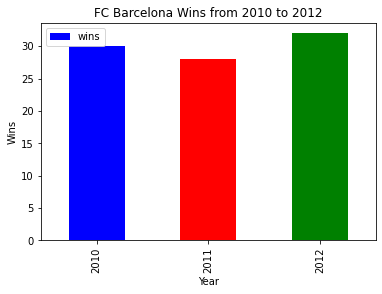

In [16]:
# DataFrames have built-in plotting!

football_df[football_df['team'] == 'FCBarcelona'].plot.bar(x='year', y='wins', 
   color=['b', 'r', 'g'], 
   title='FC Barcelona Wins from 2010 to 2012',
   xlabel='Year',
   ylabel='Wins'
   )

<AxesSubplot:title={'center':'FC Barcelona Wins from 2010 to 2012'}, xlabel='Year', ylabel='Wins'>

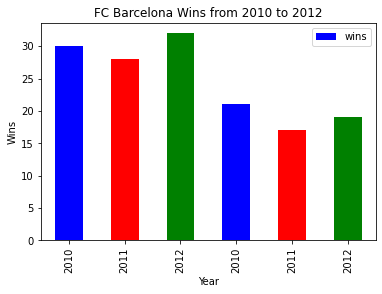

In [17]:
football_df[(football_df['team'] == 'FCBarcelona') | (football_df['team'] == 'ValenciaCF')].plot.bar(x='year', y='wins', 
   color=['b', 'r', 'g'], 
   title='FC Barcelona Wins from 2010 to 2012',
   xlabel='Year',
   ylabel='Wins'
   )

In [18]:
fcb_vcf_wins = football_df[(football_df['team'] == 'FCBarcelona') | (football_df['team'] == 'ValenciaCF')][['year','team','wins']]
fcb_vcf_wins

,year,team,wins
0,2010,FCBarcelona,30
1,2011,FCBarcelona,28
2,2012,FCBarcelona,32
6,2010,ValenciaCF,21
7,2011,ValenciaCF,17
8,2012,ValenciaCF,19


In [19]:
fcb_vcf_wins_pivoted = fcb_vcf_wins.pivot(index='year', columns='team', values='wins')
fcb_vcf_wins_pivoted

team,FCBarcelona,ValenciaCF
year,,
2010,30,21
2011,28,17
2012,32,19


<AxesSubplot:xlabel='year'>

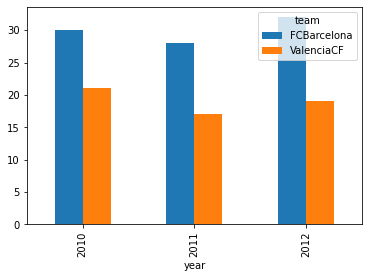

In [20]:
fcb_vcf_wins_pivoted.plot(kind='bar')

In [21]:
# The file path is ***RELATIVE TO THIS NOTEBOOK***
# if the headers are not present, can pass a list as the 'names' argument to read_csv
# can also specify other things like skipping extra spaces, etc.
housing_data = pd.read_csv('data/housing.csv')

In [22]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Using and Analyzing Data

## Questions that the housing data could potentially answer:

- What is the average amount of bedrooms in houses?
- What is the average distance from the ocean?
- How does income/house value correspond to ocean proximity?
- Does location (ocean proximity) affect size of house or number of bedrooms?
- Breakdown of attributes per-state (size, income, etc) using lat/long
- Are millenials buying bigger houses? (xxx)
- Where do people retire?


In [24]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

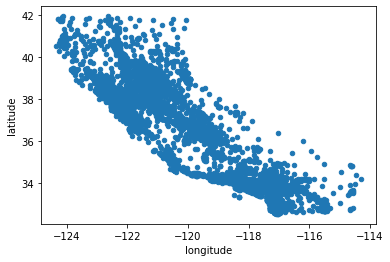

In [25]:
housing_data.plot.scatter(x = 'longitude', y = 'latitude')

<AxesSubplot:ylabel='Frequency'>

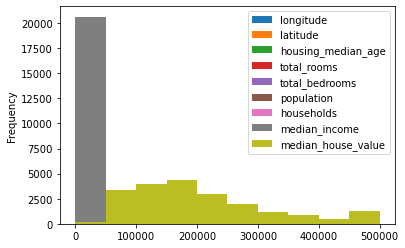

In [26]:
housing_data.plot.hist(by='median_house_value', bins=10)

In [27]:
housing_data['ocean_proximity'].plot(kind='hist',bins=100, ylabel='# of rows with that same x value', xlabel='value in dollars')

TypeError: no numeric data to plot

In [28]:
housing_data['ocean_proximity'].count()

20640

<AxesSubplot:xlabel='ocean_proximity'>

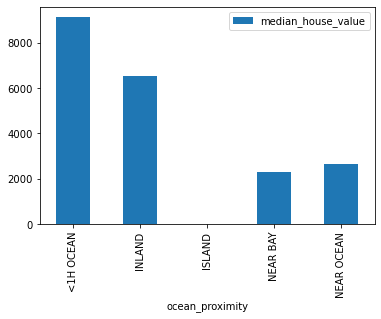

In [29]:
housing_data[['median_house_value','ocean_proximity']].groupby('ocean_proximity').count().plot(kind='bar')